### RFM 분석 프로젝트
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 주제 
- Analyzing the purchases of our customers for 1 year in America E-commerce dataset.
- How are their customer's online buying habits?
- Present your Marketing Strategies

### 컬럼설명

- Order_Date: 제품을 주문한 날짜.  
- Aging: 제품을 주문한 날짜부터 제품이 배송되는 날짜까지의 시간.  
- Customer_id: 각 고객에게 생성된 고유한 ID.  
- Gender: 고객의 성별.  
- Device_Type: 거래를 실행하는 데 고객이 사용하는 장치 (웹/모바일).
- Customer_Login_Type: 고객이 로그인한 유형. 회원, 게스트 등.
- Product_Category: 제품 카테고리.
- Product: 제품.
- Sales: 단위 판매액.
- Quantity: 제품의 단위 수량.
- Discount: 할인율.
- Profit: 기업의 이익.
- Shipping_cost: 배송 비용.
- Order_Priority: 주문 우선순위. critical, high 등.
- Payment_method: 결제 방법.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/E-commerce Dataset.csv')
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

결측치 확인

In [4]:
df.isna().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [5]:
df[df.Aging.isna()]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
27,2018-05-02,11:45:38,NaN,26058,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,55.8,5.6,High,credit_card


In [6]:
df.Aging.describe()

count    51289.000000
mean         5.255035
std          2.959948
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.500000
Name: Aging, dtype: float64

고객의 위치에 관련된 정보가 없기에, 배송되는 날짜의 평균값으로 대체

In [7]:
df.Aging = df.Aging.fillna(df.Aging.mean())

In [8]:
df.isna().sum()

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [9]:
df[df.Sales.isna()]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
793,2018-05-16,21:30:59,6.0,16381,Male,Web,Member,Auto & Accessories,Car Speakers,NaN,1.0,0.1,124.7,12.5,Critical,credit_card


Sales의 관계를 확인하기위해 금액 관련된 데이터들만 따로 모아서 확인

In [10]:
df[['Sales', 'Quantity','Discount','Profit','Shipping_Cost']].head(10)

,Sales,Quantity,Discount,Profit,Shipping_Cost
0,140.0,1.0,0.3,46.0,4.6
1,211.0,1.0,0.3,112.0,11.2
2,117.0,5.0,0.1,31.2,3.1
3,118.0,1.0,0.3,26.2,2.6
4,250.0,1.0,0.3,160.0,16.0
5,72.0,1.0,0.3,24.0,2.4
6,54.0,1.0,0.3,54.0,5.4
7,114.0,5.0,0.2,22.6,2.3
8,231.0,5.0,0.3,116.4,11.6
9,140.0,1.0,0.2,54.4,5.4


Profit feature는 아무런 연관성이 없다는 것을 확인.  
기업의 순수익인 것을 확인

Product로 금액을 확인

In [11]:
df_CS = df[df.Product == 'Car Speakers']
df_CS

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
10,2018-07-13,19:58:11,10.0,22249,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,4.0,0.1,122.6,12.3,Critical,credit_card
19,2018-02-18,14:31:30,6.0,26127,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.2,122.6,12.3,Critical,credit_card
28,2018-08-25,13:50:30,7.0,38941,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
37,2018-10-01,12:23:13,3.0,27385,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,4.0,0.1,122.6,12.3,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17650,2018-06-30,17:29:42,6.0,58003,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.2,109.9,11.0,High,money_order
17659,2018-04-20,11:27:51,10.0,53301,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,4.0,0.2,97.2,9.7,High,money_order
17668,2018-09-05,08:57:45,8.0,29153,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,3.0,0.1,124.7,12.5,Critical,e_wallet
17679,2018-07-30,16:48:21,3.0,52305,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,4.0,0.2,97.2,9.7,Medium,credit_card


In [12]:
df_CS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 1 to 17688
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           826 non-null    object 
 1   Time                 826 non-null    object 
 2   Aging                826 non-null    float64
 3   Customer_Id          826 non-null    int64  
 4   Gender               826 non-null    object 
 5   Device_Type          826 non-null    object 
 6   Customer_Login_type  826 non-null    object 
 7   Product_Category     826 non-null    object 
 8   Product              826 non-null    object 
 9   Sales                825 non-null    float64
 10  Quantity             826 non-null    float64
 11  Discount             826 non-null    float64
 12  Profit               826 non-null    float64
 13  Shipping_Cost        826 non-null    float64
 14  Order_Priority       826 non-null    object 
 15  Payment_method       826 non-null    object

In [13]:
df_CS.describe().T

,count,mean,std,min,25%,50%,75%,max
Aging,826.0,5.452785,2.811806,1.0,3.00,5.0,8.0,10.0
Customer_Id,826.0,34606.467312,14712.620963,10027.0,21842.75,34054.0,47388.5,59889.0
Sales,825.0,211.000000,0.000000,211.0,211.00,211.0,211.0,211.0
Quantity,826.0,2.411622,1.615849,1.0,1.00,1.0,4.0,5.0
Discount,826.0,0.213801,0.081818,0.1,0.10,0.2,0.3,0.3
Profit,826.0,111.573245,13.643727,78.3,99.40,114.1,122.6,128.9
Shipping_Cost,826.0,11.158232,1.372169,7.8,9.90,11.4,12.3,12.9


해당 feature의 모든 가격이 211로 동일한 것을 확인. 그 값으로 대체

In [14]:
df.Sales = df.Sales.fillna(df_CS.Sales.mean())
df.isna().sum()

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [15]:
df[df.Quantity.isna()]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
95,2018-04-22,11:32:22,5.0,52267,Male,Web,Member,Auto & Accessories,Bike Tyres,72.0,NaN,0.1,36.0,3.6,Critical,credit_card
321,2018-06-05,11:04:11,3.0,41850,Male,Web,Member,Auto & Accessories,Car Mat,54.0,NaN,0.2,54.0,5.4,Critical,credit_card


얼마나 샀는지는 확인이 불가하기에, 제거

In [16]:
df = df.dropna(subset=['Quantity'])
df.isna().sum()

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [17]:
df[df.Discount.isna()]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
211,2018-08-05,17:27:54,6.0,47137,Male,Web,Member,Auto & Accessories,Tyre,250.0,5.0,NaN,132.5,13.3,Medium,credit_card


할인율이 얼마인지 확인이 안되기에, 0으로 대체

In [18]:
df.Discount = df.Discount.fillna(0.0)
df.isna().sum()

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\3463134838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Discount = df.Discount.fillna(0.0)


Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [19]:
df[df.Shipping_Cost.isna()]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
535,2018-04-16,16:20:02,3.0,13777,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,NaN,Critical,credit_card


In [20]:
df.Shipping_Cost.mean()

7.0416557802172095

In [21]:
df.Shipping_Cost.describe()

count    51287.000000
mean         7.041656
std          4.871811
min          0.100000
25%          2.500000
50%          6.000000
75%         11.800000
max         16.800000
Name: Shipping_Cost, dtype: float64

평균값으로 대체

In [22]:
df.Shipping_Cost = df.Shipping_Cost.fillna(df.Shipping_Cost.mean())
df.isna().sum()

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\99337945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Shipping_Cost = df.Shipping_Cost.fillna(df.Shipping_Cost.mean())


Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         2
Payment_method         0
dtype: int64

In [23]:
df[df.Order_Priority.isna()]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
625,2018-10-15,20:16:34,2.0,26367,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.3,140.0,14.0,NaN,debit_card
791,2018-07-03,23:40:16,4.0,36902,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,1.0,0.1,148.7,14.9,NaN,money_order


In [24]:
df.Order_Priority.value_counts()

Order_Priority
Medium      29433
High        15499
Critical     3930
Low          2424
Name: count, dtype: int64

주문 우선순위이기에,다른 연관성을 확인하기 힘들어 가장 많은 값인 Medium으로 처리

In [25]:
df.Order_Priority = df.Order_Priority.fillna('Medium')
df.isna().sum()

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\2267627136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Order_Priority = df.Order_Priority.fillna('Medium')


Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

결측치 처리완료

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aging,51288.0,5.255084,2.959960,1.0,3.00,5.0,8.0,10.5
Customer_Id,51288.0,58156.191507,26032.610840,10000.0,35829.75,61019.0,80737.0,99999.0
Sales,51288.0,152.345500,66.494208,33.0,85.00,140.0,218.0,250.0
Quantity,51288.0,2.502983,1.511859,1.0,1.00,2.0,4.0,5.0
Discount,51288.0,0.303822,0.131031,0.0,0.20,0.3,0.4,0.5
Profit,51288.0,70.408216,48.730148,0.5,24.90,59.9,118.4,167.5
Shipping_Cost,51288.0,7.041656,4.871763,0.1,2.50,6.0,11.8,16.8


rfm 모델 생성

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51288 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51288 non-null  object 
 1   Time                 51288 non-null  object 
 2   Aging                51288 non-null  float64
 3   Customer_Id          51288 non-null  int64  
 4   Gender               51288 non-null  object 
 5   Device_Type          51288 non-null  object 
 6   Customer_Login_type  51288 non-null  object 
 7   Product_Category     51288 non-null  object 
 8   Product              51288 non-null  object 
 9   Sales                51288 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51288 non-null  float64
 12  Profit               51288 non-null  float64
 13  Shipping_Cost        51288 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51288 non-null  obje

In [28]:
df['Order_Date'].sort_values()

35841    2018-01-01
29832    2018-01-01
29897    2018-01-01
30083    2018-01-01
2170     2018-01-01
            ...    
32325    2018-12-30
32339    2018-12-30
23039    2018-12-30
8846     2018-12-30
16751    2018-12-30
Name: Order_Date, Length: 51288, dtype: object

In [29]:
df.Order_Date = pd.to_datetime(df.Order_Date)
df

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\3317606291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Order_Date = pd.to_datetime(df.Order_Date)


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


Order_Date를 기준으로 Recency를 구함

In [30]:
df.loc[:,'Recency'] = pd.to_datetime(df['Order_Date']).apply(lambda x : (pd.to_datetime('2018-12-30')- x).days)
df

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\841164246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Recency'] = pd.to_datetime(df['Order_Date']).apply(lambda x : (pd.to_datetime('2018-12-30')- x).days)


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Recency
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,362
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,159
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,52
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,256
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,305
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card,305
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,305
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,305


In [31]:
df[df.Recency < 0]

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Recency


In [32]:
df.groupby('Customer_Id').count()

,Order_Date,Time,Aging,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Recency
Customer_Id,,,,,,,,,,,,,,,,
10000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
10002,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10006,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
10013,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
99991,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
99992,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Customer_Id에 중복된 값이 있는것을 확인

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51288 entries, 0 to 51289
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51288 non-null  datetime64[ns]
 1   Time                 51288 non-null  object        
 2   Aging                51288 non-null  float64       
 3   Customer_Id          51288 non-null  int64         
 4   Gender               51288 non-null  object        
 5   Device_Type          51288 non-null  object        
 6   Customer_Login_type  51288 non-null  object        
 7   Product_Category     51288 non-null  object        
 8   Product              51288 non-null  object        
 9   Sales                51288 non-null  float64       
 10  Quantity             51288 non-null  float64       
 11  Discount             51288 non-null  float64       
 12  Profit               51288 non-null  float64       
 13  Shipping_Cost        51288 non-null 

In [34]:
df['price'] = df['Quantity'] * df['Sales']
df['price'] = df['price'] * (1 - df['Discount'])
df

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\3932979078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['Quantity'] * df['Sales']
C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\3932979078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'] * (1 - df['Discount'])


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Recency,price
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,362,98.0
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,159,147.7
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,52,526.5
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,256,82.6
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,139,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,305,347.2
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card,305,280.0
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,305,93.1
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,305,172.8


In [35]:
df['price'] = df['price'] + df['Shipping_Cost']
df

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\1370556285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'] + df['Shipping_Cost']


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Recency,price
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,362,102.6
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,159,158.9
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,52,529.6
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,256,85.2
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,139,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,305,349.1
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card,305,281.4
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,305,97.1
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,305,186.0


In [36]:
m_df = df.groupby('Customer_Id')['price'].sum().reset_index()
m_df

,Customer_Id,price
0,10000,255.6
1,10002,274.8
2,10004,170.2
3,10006,576.9
4,10013,118.7
...,...,...
38990,99990,189.8
38991,99991,76.9
38992,99992,65.8
38993,99993,296.3


In [37]:
rf_df = df.groupby('Customer_Id').agg(Recency=('Recency', 'min'),Frequency=('Customer_Id', 'count')).reset_index()
rf_df

,Customer_Id,Recency,Frequency
0,10000,24,2
1,10002,132,1
2,10004,144,1
3,10006,144,2
4,10013,227,1
...,...,...,...
38990,99990,8,1
38991,99991,54,1
38992,99992,214,1
38993,99993,174,1


In [38]:
rfm_df = rf_df.merge(m_df, on='Customer_Id')
rfm_df 

,Customer_Id,Recency,Frequency,price
0,10000,24,2,255.6
1,10002,132,1,274.8
2,10004,144,1,170.2
3,10006,144,2,576.9
4,10013,227,1,118.7
...,...,...,...,...
38990,99990,8,1,189.8
38991,99991,54,1,76.9
38992,99992,214,1,65.8
38993,99993,174,1,296.3


In [39]:
rfm_df = rfm_df.rename(columns = {'price' : 'Monetary'})
rfm_df

,Customer_Id,Recency,Frequency,Monetary
0,10000,24,2,255.6
1,10002,132,1,274.8
2,10004,144,1,170.2
3,10006,144,2,576.9
4,10013,227,1,118.7
...,...,...,...,...
38990,99990,8,1,189.8
38991,99991,54,1,76.9
38992,99992,214,1,65.8
38993,99993,174,1,296.3


In [40]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency','Frequency','Monetary']])

In [41]:
rfm_df[['Recency','Frequency','Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency','Frequency','Monetary'])
rfm_df

,Customer_Id,Recency,Frequency,Monetary
0,10000,0.066116,0.2,0.079658
1,10002,0.363636,0.0,0.086087
2,10004,0.396694,0.0,0.051063
3,10006,0.396694,0.2,0.187243
4,10013,0.625344,0.0,0.033819
...,...,...,...,...
38990,99990,0.022039,0.0,0.057626
38991,99991,0.148760,0.0,0.019823
38992,99992,0.589532,0.0,0.016106
38993,99993,0.479339,0.0,0.093286


In [42]:
rfm_df['Recency'] = 1 - rfm_df['Recency']
rfm_df

,Customer_Id,Recency,Frequency,Monetary
0,10000,0.933884,0.2,0.079658
1,10002,0.636364,0.0,0.086087
2,10004,0.603306,0.0,0.051063
3,10006,0.603306,0.2,0.187243
4,10013,0.374656,0.0,0.033819
...,...,...,...,...
38990,99990,0.977961,0.0,0.057626
38991,99991,0.851240,0.0,0.019823
38992,99992,0.410468,0.0,0.016106
38993,99993,0.520661,0.0,0.093286


In [43]:
rfm_df['TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']
rfm_df

,Customer_Id,Recency,Frequency,Monetary,TotalScore
0,10000,0.933884,0.2,0.079658,1.213543
1,10002,0.636364,0.0,0.086087,0.722451
2,10004,0.603306,0.0,0.051063,0.654369
3,10006,0.603306,0.2,0.187243,0.990548
4,10013,0.374656,0.0,0.033819,0.408474
...,...,...,...,...,...
38990,99990,0.977961,0.0,0.057626,1.035587
38991,99991,0.851240,0.0,0.019823,0.871062
38992,99992,0.410468,0.0,0.016106,0.426574
38993,99993,0.520661,0.0,0.093286,0.613948


In [44]:
df = df.merge(rfm_df[['Customer_Id', 'TotalScore']], on='Customer_Id')
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Recency,price,TotalScore
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,362,102.6,0.031183
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,159,158.9,0.609263
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,52,529.6,1.028154
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,256,85.2,0.317368
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,139,191.0,0.675108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,305,216.7,0.226413
51284,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,305,349.1,0.270746
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,305,97.1,0.186366
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,305,186.0,0.216133


In [45]:
df = df.drop('Recency', axis=1)
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,102.6,0.031183
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,158.9,0.609263
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,529.6,1.028154
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,85.2,0.317368
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,191.0,0.675108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,216.7,0.226413
51284,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,349.1,0.270746
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,97.1,0.186366
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,186.0,0.216133


In [46]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order_Date,51288,2018-07-23 11:31:03.172671744,2018-01-01 00:00:00,2018-05-07 00:00:00,2018-07-28 00:00:00,2018-10-17 00:00:00,2018-12-30 00:00:00,NaN
Aging,51288.0,5.255084,1.0,3.0,5.0,8.0,10.5,2.95996
Customer_Id,51288.0,58156.191507,10000.0,35829.75,61019.0,80737.0,99999.0,26032.61084
Sales,51288.0,152.3455,33.0,85.0,140.0,218.0,250.0,66.494208
Quantity,51288.0,2.502983,1.0,1.0,2.0,4.0,5.0,1.511859
Discount,51288.0,0.303822,0.0,0.2,0.3,0.4,0.5,0.131031
Profit,51288.0,70.408216,0.5,24.9,59.9,118.4,167.5,48.730148
Shipping_Cost,51288.0,7.041656,0.1,2.5,6.0,11.8,16.8,4.871763
price,51288.0,271.296571,17.7,109.4,195.8,380.5,1263.3,218.208692
TotalScore,51288.0,0.891975,0.007634,0.595611,0.895053,1.168514,2.629201,0.405101


In [47]:
l1, l2, l3, l4 = np.percentile(df['TotalScore'], [25, 45, 69, 88])
print(l1,l2,l3,l4)

0.5956105505075872 0.8432369907005769 1.0895453784454285 1.3646591479841104


In [48]:
def get_level(x):
    if x<= l1:
        return 5
    if x<= l2:
        return 4
    if x<= l3:
        return 3
    if x<= l4:
        return 2
    return 1

In [49]:
df['Level'] = df['TotalScore'].apply(get_level)
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,102.6,0.031183,5
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,158.9,0.609263,4
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,529.6,1.028154,3
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,85.2,0.317368,5
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,191.0,0.675108,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,216.7,0.226413,5
51284,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,349.1,0.270746,5
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,97.1,0.186366,5
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,186.0,0.216133,5


In [50]:
df['Level'] = df['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

In [51]:
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,102.6,0.031183,Bronze
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,158.9,0.609263,Silver
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,529.6,1.028154,Gold
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,85.2,0.317368,Bronze
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,191.0,0.675108,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,216.7,0.226413,Bronze
51284,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,349.1,0.270746,Bronze
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,97.1,0.186366,Bronze
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,186.0,0.216133,Bronze


In [52]:
df['Level'].value_counts()

Level
Bronze     12823
Gold       12309
Silver     10258
Diamond     9744
VIP         6154
Name: count, dtype: int64

In [53]:
df[df.Level == 'VIP']

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
15,2018-12-01,14:14:28,5.0,56296,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,140.0,14.0,High,credit_card,189.0,1.562541,VIP
16,2018-12-20,21:36:47,3.0,56296,Male,Web,Member,Fashion,Jeans,218.0,5.0,0.1,127.1,12.7,Medium,credit_card,993.7,1.562541,VIP
21,2018-04-21,00:03:41,7.0,50942,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,93.3,9.3,High,credit_card,817.8,1.473029,VIP
22,2018-12-19,12:58:02,6.0,50942,Male,Web,Member,Electronic,Speakers,130.0,1.0,0.2,17.5,1.8,Medium,credit_card,105.8,1.473029,VIP
29,2018-11-09,11:44:40,2.0,51542,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,4.0,0.2,18.0,1.8,Critical,credit_card,232.2,1.397056,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,2018-12-27,14:29:03,7.0,70592,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,5.0,0.3,103.6,10.4,Medium,money_order,766.4,1.594548,VIP
49987,2018-12-21,18:50:20,10.0,66872,Male,Web,Member,Home & Furniture,Beds,78.0,4.0,0.2,19.5,2.0,Medium,credit_card,251.6,1.524545,VIP
49988,2018-10-30,18:57:54,10.0,66872,Male,Web,Member,Home & Furniture,Towels,228.0,5.0,0.3,113.8,11.4,Medium,credit_card,809.4,1.524545,VIP
50310,2018-05-08,17:02:32,8.0,84253,Female,Mobile,Member,Home & Furniture,Sofa Covers,216.0,4.0,0.2,118.7,11.9,Medium,credit_card,703.1,1.482349,VIP


In [54]:
level_order = ['Bronze','Silver','Gold','Diamond','VIP']

df_customer = df.groupby('Customer_Id')[['Level', 'Gender']].first().reset_index()
df_customer

,Customer_Id,Level,Gender
0,10000,Diamond,Male
1,10002,Silver,Male
2,10004,Silver,Male
3,10006,Gold,Male
4,10013,Bronze,Male
...,...,...,...
38990,99990,Gold,Female
38991,99991,Gold,Male
38992,99992,Bronze,Female
38993,99993,Silver,Male


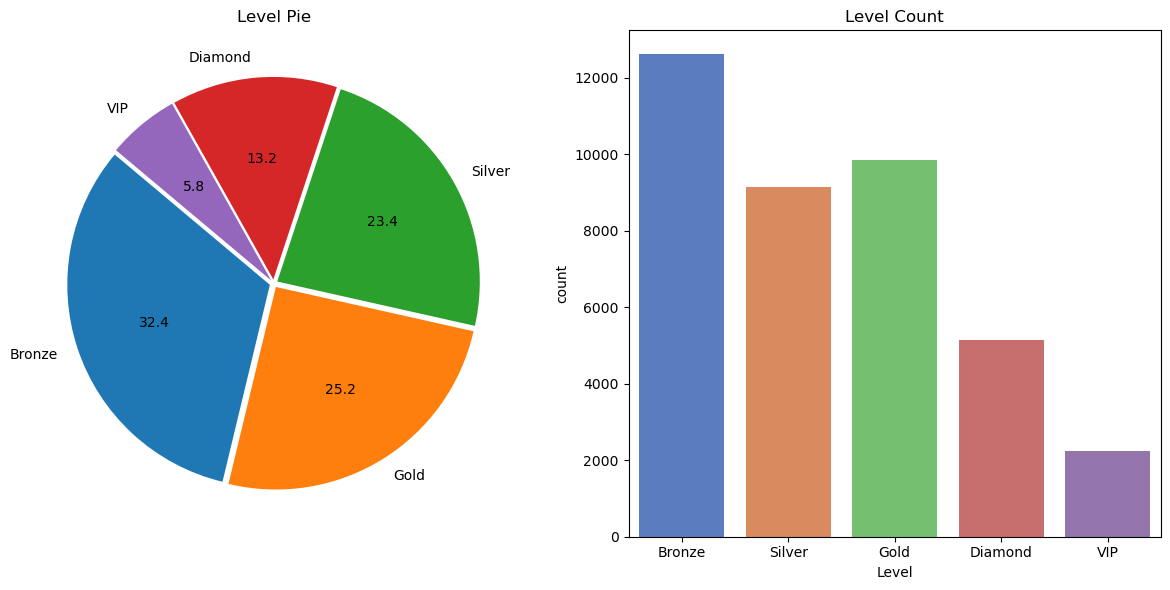

In [55]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

level_counts = df_customer['Level'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)] ,explode=[0.02,0.02,0.02,0.02,0.02])
axes[0].set_title('Level Pie')


sns.countplot(x='Level', data=df_customer, palette='muted',order=level_order, ax=axes[1])
axes[1].set_title('Level Count')

plt.tight_layout()
plt.show()


성별 별 구분

In [56]:
gender_order = ['Male','Female']

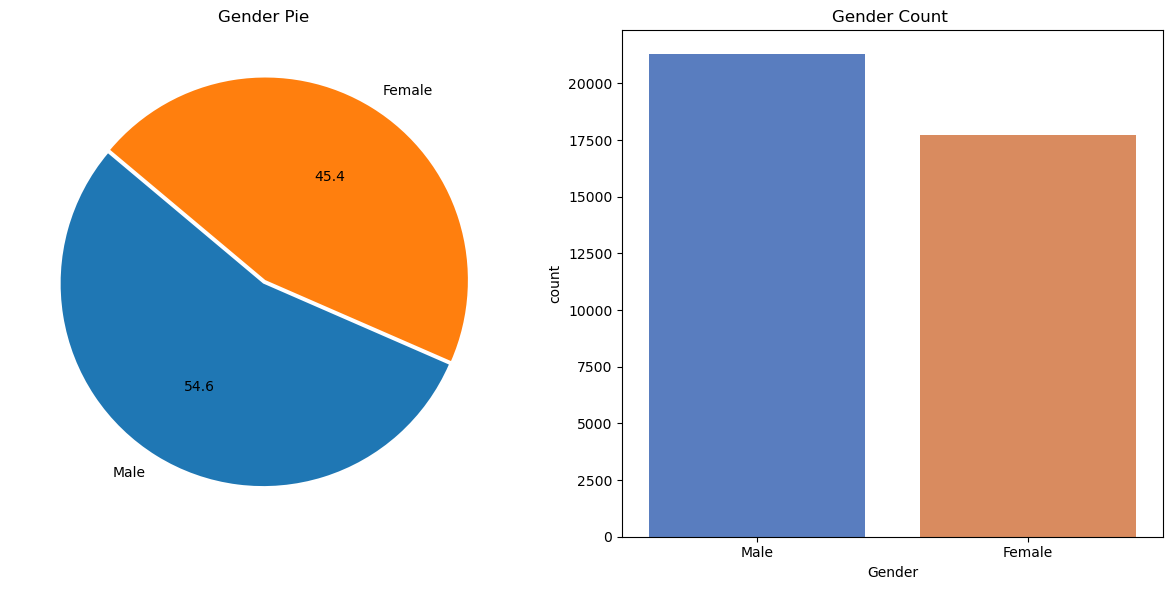

In [57]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

level_counts = df_customer['Gender'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)], explode=[0,0.02])
axes[0].set_title('Gender Pie')


sns.countplot(x='Gender', data=df_customer, palette='muted',order=gender_order, ax=axes[1])
axes[1].set_title('Gender Count ')

plt.tight_layout()
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51288 entries, 0 to 51287
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51288 non-null  datetime64[ns]
 1   Time                 51288 non-null  object        
 2   Aging                51288 non-null  float64       
 3   Customer_Id          51288 non-null  int64         
 4   Gender               51288 non-null  object        
 5   Device_Type          51288 non-null  object        
 6   Customer_Login_type  51288 non-null  object        
 7   Product_Category     51288 non-null  object        
 8   Product              51288 non-null  object        
 9   Sales                51288 non-null  float64       
 10  Quantity             51288 non-null  float64       
 11  Discount             51288 non-null  float64       
 12  Profit               51288 non-null  float64       
 13  Shipping_Cost        51288 non-

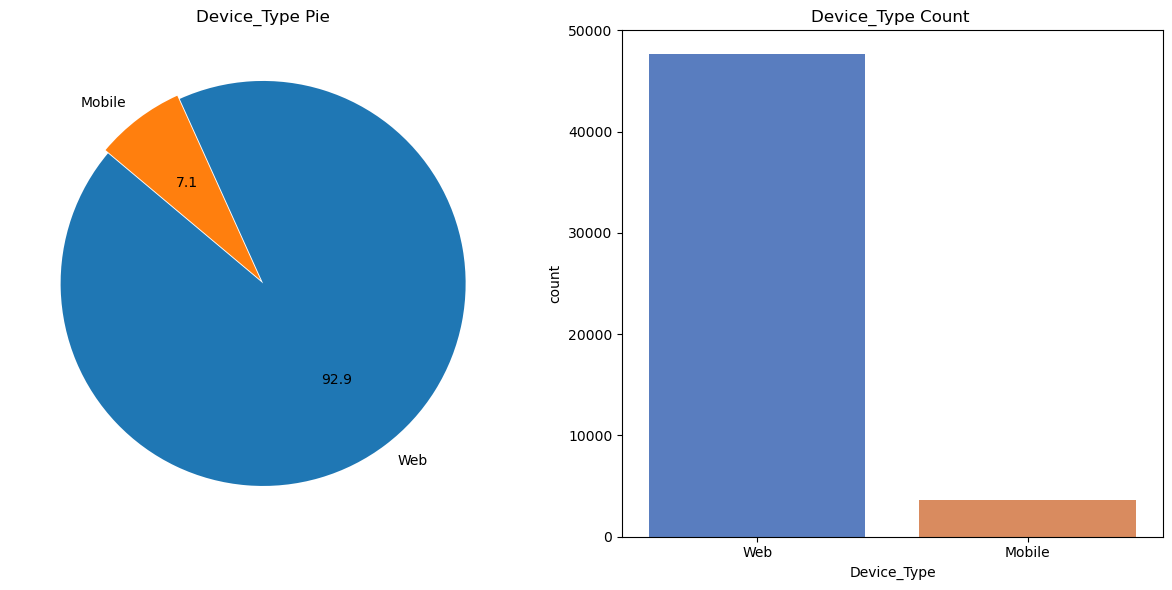

In [59]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

level_counts = df['Device_Type'].value_counts()
labels = level_counts.index.tolist()
sizes = level_counts.values

axes[0].pie(sizes, labels=labels, autopct='%1.1f', startangle=140, colors=plt.cm.tab10.colors[:len(labels)], explode=[0,0.02])
axes[0].set_title('Device_Type Pie')


sns.countplot(x='Device_Type', data=df, palette='muted', ax=axes[1])
axes[1].set_title('Device_Type Count ')

plt.tight_layout()
plt.show()


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51288 entries, 0 to 51287
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51288 non-null  datetime64[ns]
 1   Time                 51288 non-null  object        
 2   Aging                51288 non-null  float64       
 3   Customer_Id          51288 non-null  int64         
 4   Gender               51288 non-null  object        
 5   Device_Type          51288 non-null  object        
 6   Customer_Login_type  51288 non-null  object        
 7   Product_Category     51288 non-null  object        
 8   Product              51288 non-null  object        
 9   Sales                51288 non-null  float64       
 10  Quantity             51288 non-null  float64       
 11  Discount             51288 non-null  float64       
 12  Profit               51288 non-null  float64       
 13  Shipping_Cost        51288 non-

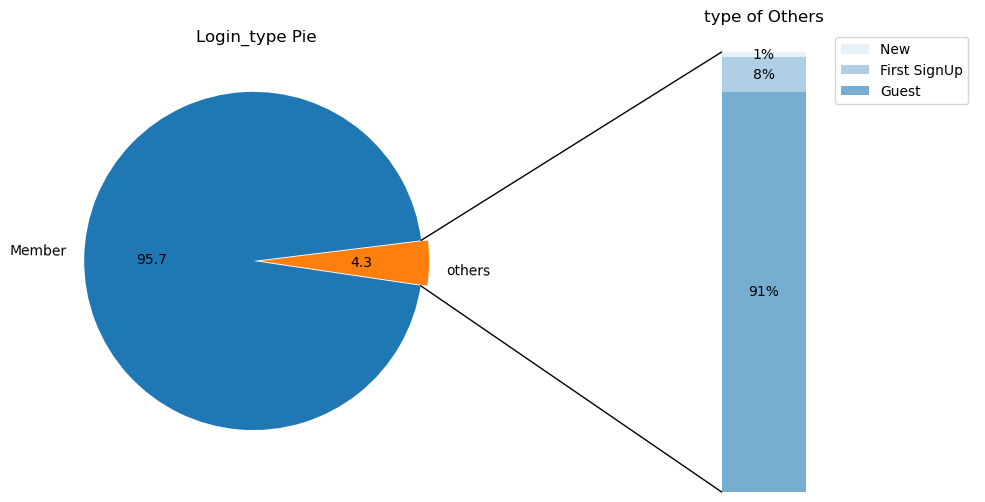

In [61]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

level_counts = df['Customer_Login_type'].value_counts()
labels = level_counts.index.tolist()
label = [labels[0], 'others']

sizes = level_counts.values
size = [sizes[0] , (sizes[1]+sizes[2]+sizes[3])]
ratio = sizes/sizes.sum()
angle = 180 * ratio[1]

wedges, *_ = ax1.pie(size, labels=label, autopct='%1.1f', startangle=angle, colors=plt.cm.tab10.colors[:len(labels)],\
            rotatelabels=True,explode=[0.02,0.02])
ax1.set_title('Login_type Pie')

# bar chart parameters
bottom = 1
width = .2
bar_ratio = [sizes[1], sizes[2],sizes[3]]/(sizes[1]+sizes[2]+sizes[3])
type_ratios = bar_ratio
type_labels = ['Guest','First SignUp', 'New ']


for j, (height, label) in enumerate(reversed([*zip(type_ratios, type_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label, alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type ='center')

ax2.set_title('type of Others')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# use connectionpatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(type_ratios)

#draw top connecting line

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,\
                     xyB=(x, y), coordsB=ax1.transData)
con.set_color([0,0,0])
con.set_linewidth(1)
ax2.add_artist(con)

#draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)


plt.show()

In [62]:
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,102.6,0.031183,Bronze
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,158.9,0.609263,Silver
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,529.6,1.028154,Gold
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,85.2,0.317368,Bronze
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,191.0,0.675108,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,216.7,0.226413,Bronze
51284,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,349.1,0.270746,Bronze
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,97.1,0.186366,Bronze
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,186.0,0.216133,Bronze


In [63]:
df_category_price = df.groupby('Product_Category')['price'].sum().reset_index()
df_category_price

,Product_Category,price
0,Auto & Accessories,2.069122e+06
1,Electronic,7.469600e+05
2,Fashion,7.512474e+06
3,Home & Furniture,3.585702e+06


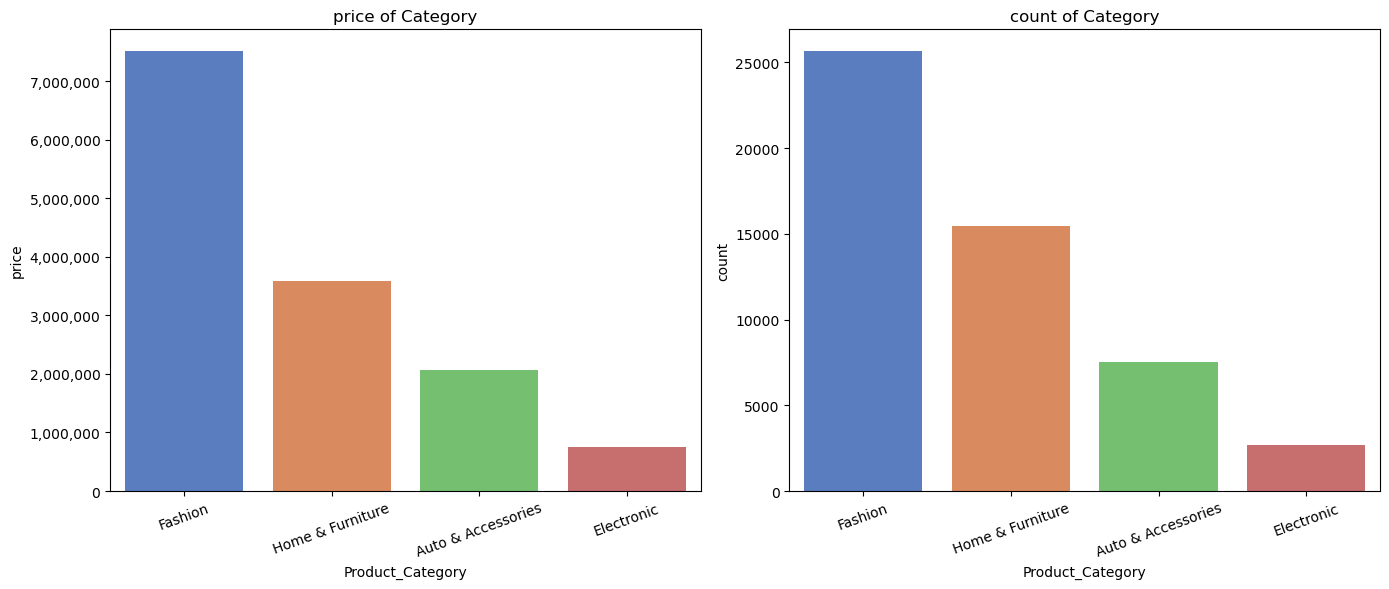

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

product_order = ['Fashion','Home & Furniture','Auto & Accessories','Electronic']


sns.barplot(x='Product_Category', y='price', data=df_category_price, palette='muted', ax=ax1, order=product_order)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20)
ax1.set_title('price of Category')
sns.countplot(x='Product_Category', data=df, order=product_order,palette='muted',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20)
ax2.set_title('count of Category')
# y축 눈금 숫자로 변경

from matplotlib.ticker import FuncFormatter
def format_y_tick(value, _):
    return '{:,.0f}'.format(value)

ax1.yaxis.set_major_formatter(FuncFormatter(format_y_tick))

plt.tight_layout()

plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51288 entries, 0 to 51287
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51288 non-null  datetime64[ns]
 1   Time                 51288 non-null  object        
 2   Aging                51288 non-null  float64       
 3   Customer_Id          51288 non-null  int64         
 4   Gender               51288 non-null  object        
 5   Device_Type          51288 non-null  object        
 6   Customer_Login_type  51288 non-null  object        
 7   Product_Category     51288 non-null  object        
 8   Product              51288 non-null  object        
 9   Sales                51288 non-null  float64       
 10  Quantity             51288 non-null  float64       
 11  Discount             51288 non-null  float64       
 12  Profit               51288 non-null  float64       
 13  Shipping_Cost        51288 non-

In [66]:
df_order_sum = df.groupby('Order_Priority')['price'].sum().reset_index()
df_order_sum

,Order_Priority,price
0,Critical,1.018699e+06
1,High,4.134672e+06
2,Low,6.566456e+05
3,Medium,8.104242e+06


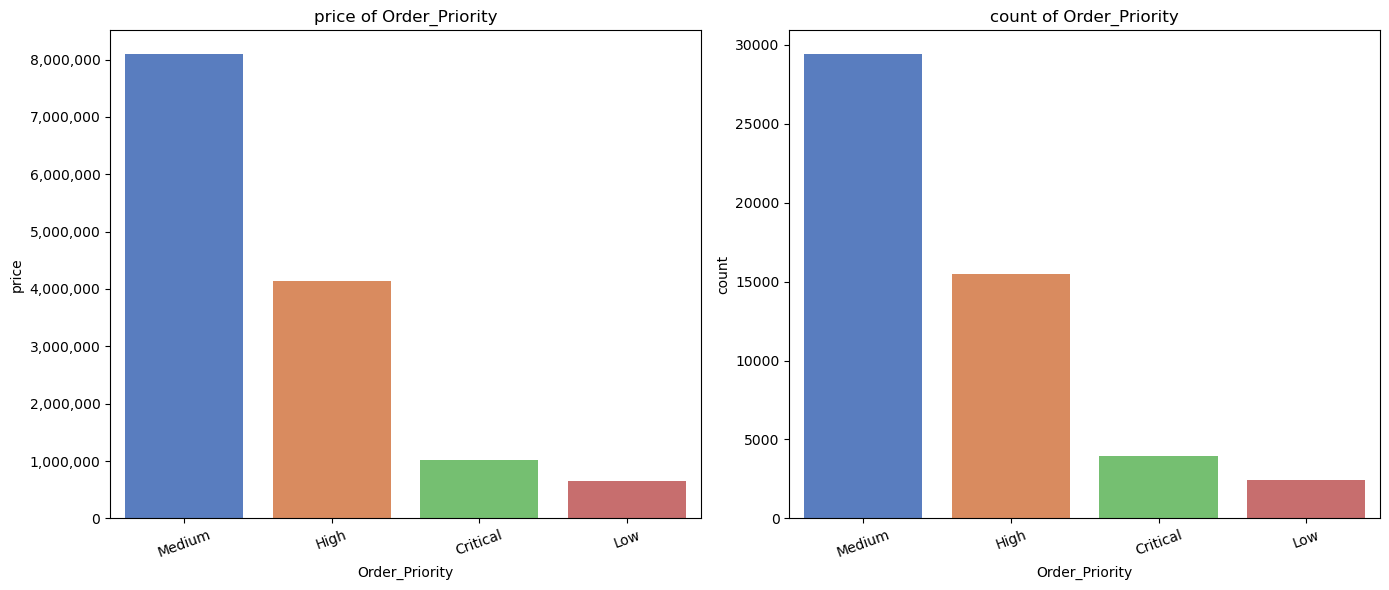

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

priority_order = ['Medium','High','Critical','Low']


sns.barplot(x='Order_Priority', y='price', data=df_order_sum, palette='muted', ax=ax1, order=priority_order)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20)
ax1.set_title('price of Order_Priority')
sns.countplot(x='Order_Priority', data=df, order=priority_order,palette='muted',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20)
ax2.set_title('count of Order_Priority')
# y축 눈금 숫자로 변경

from matplotlib.ticker import FuncFormatter
def format_y_tick(value, _):
    return '{:,.0f}'.format(value)

ax1.yaxis.set_major_formatter(FuncFormatter(format_y_tick))

plt.tight_layout()

plt.show()

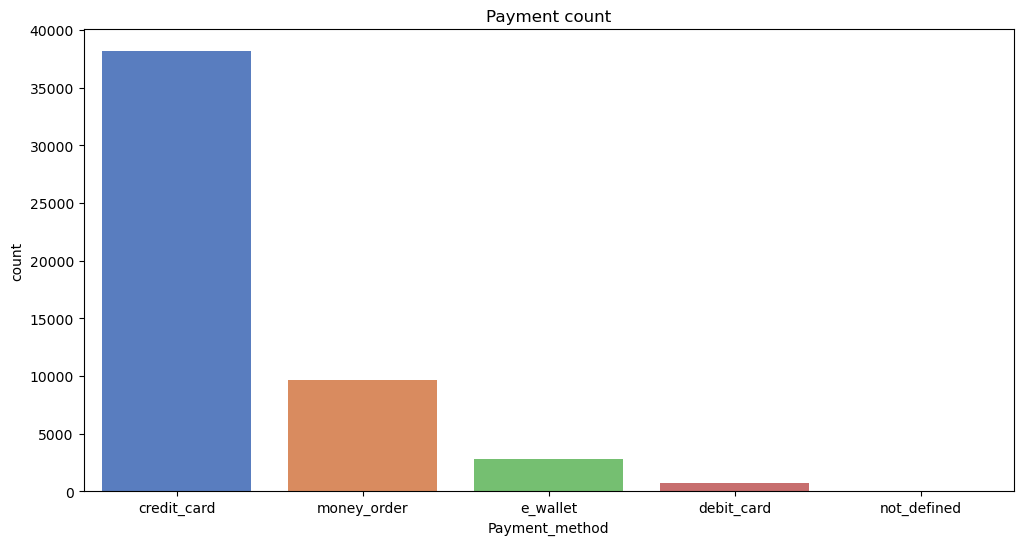

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(x='Payment_method', data=df, palette='muted')
plt.title('Payment count')
plt.show()

Level별 비교

Level과 gender

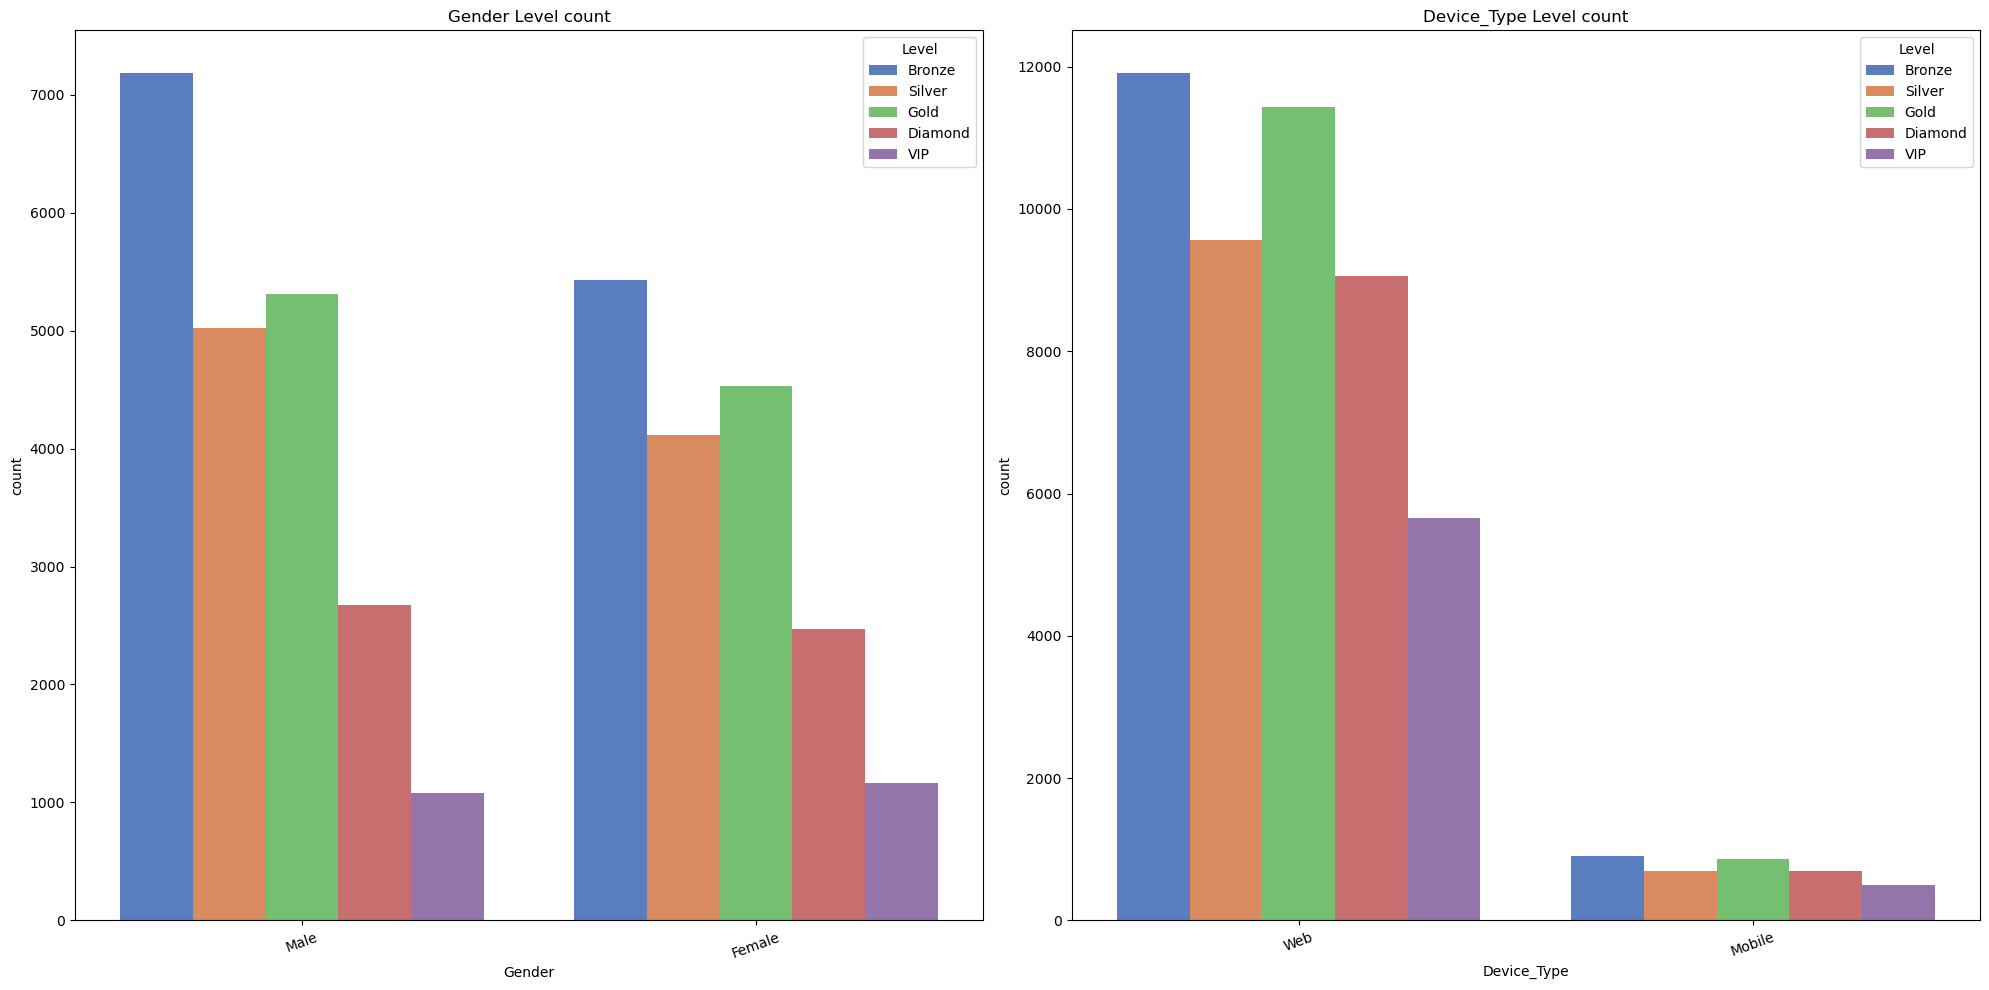

In [69]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(x='Gender', data=df_customer, hue='Level', hue_order=level_order, palette='muted', ax=axes[0])
axes[0].set_title('Gender Level count')
axes[0].tick_params(axis='x', rotation=20)


sns.countplot(x='Device_Type', data=df, hue='Level', hue_order=level_order, palette='muted', ax=axes[1])
axes[1].set_title('Device_Type Level count')
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

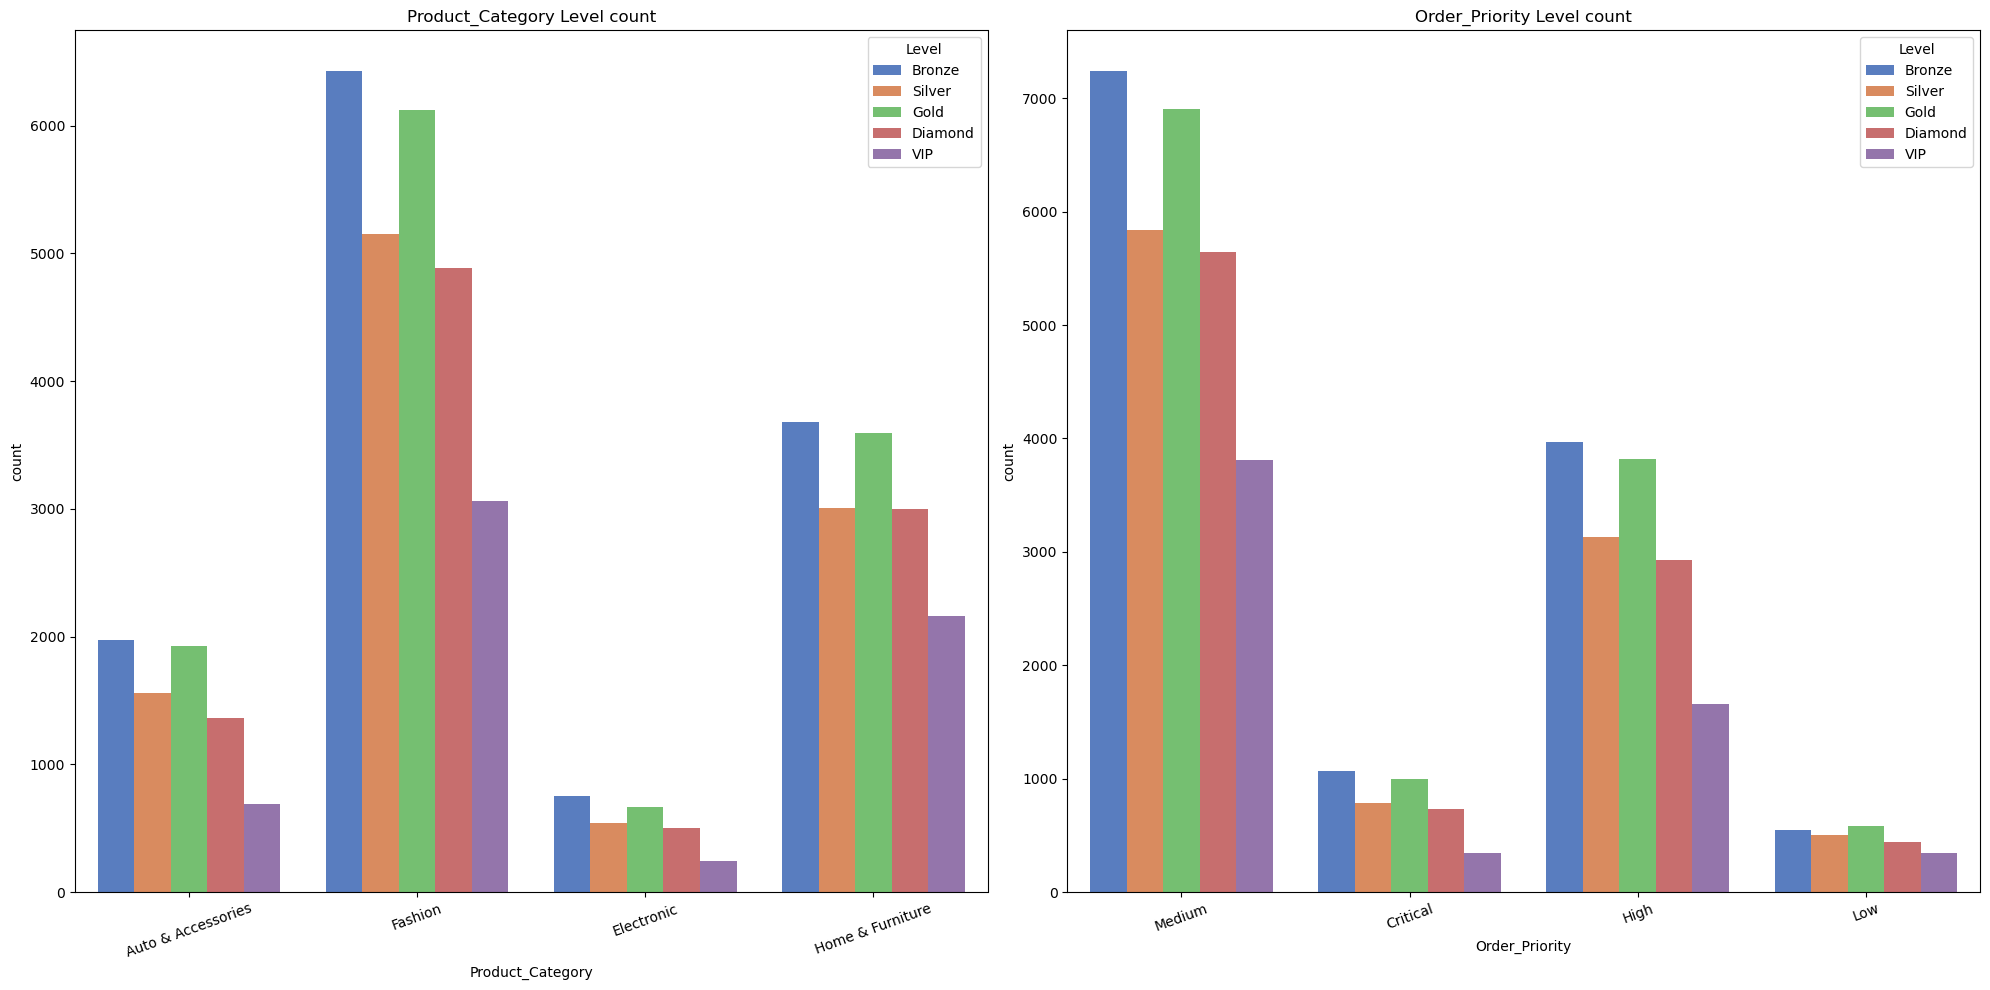

In [70]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(x='Product_Category', data=df, hue='Level', hue_order=level_order, palette='muted', ax=axes[0])
axes[0].set_title('Product_Category Level count')
axes[0].tick_params(axis='x', rotation=20)


sns.countplot(x='Order_Priority', data=df, hue='Level', hue_order=level_order, palette='muted', ax=axes[1])
axes[1].set_title('Order_Priority Level count')
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

성별과 비교

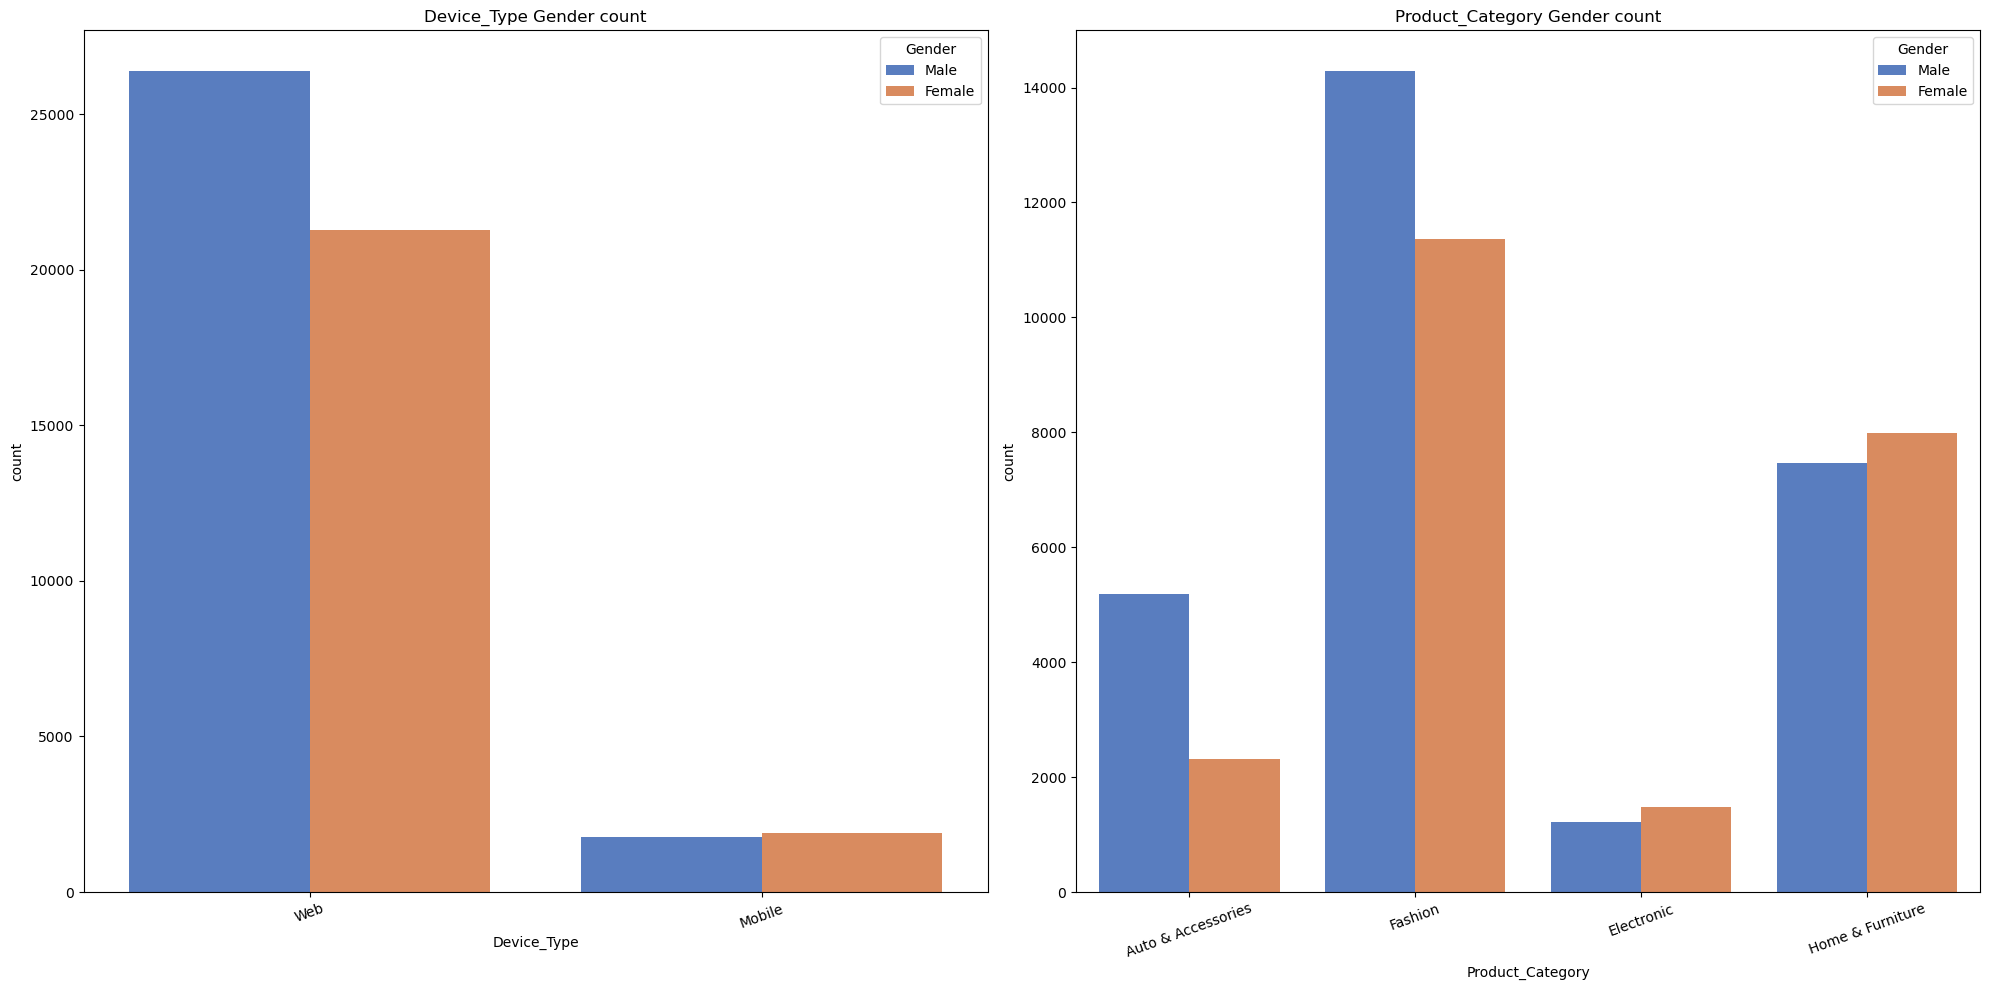

In [71]:
fig, axes = plt.subplots(1,2,figsize=(20,10))

sns.countplot(x='Device_Type', data=df, hue='Gender', hue_order=gender_order, palette='muted', ax=axes[0])
axes[0].set_title('Device_Type Gender count')
axes[0].tick_params(axis='x', rotation=20)


sns.countplot(x='Product_Category', data=df, hue='Gender', hue_order=gender_order, palette='muted', ax=axes[1])
axes[1].set_title('Product_Category Gender count')
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

In [72]:
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,102.6,0.031183,Bronze
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,158.9,0.609263,Silver
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,529.6,1.028154,Gold
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,85.2,0.317368,Bronze
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,191.0,0.675108,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,216.7,0.226413,Bronze
51284,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order,349.1,0.270746,Bronze
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,97.1,0.186366,Bronze
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,186.0,0.216133,Bronze


In [73]:
df_Fash = df[df['Product_Category'] == 'Fashion']
df_Fash

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
6,2018-11-14,17:13:56,3.0,39783,Female,Web,Member,Fashion,Jeans,218.0,1.0,0.3,131.5,13.1,Medium,credit_card,165.7,1.140514,Diamond
14,2018-08-01,13:01:36,2.0,18622,Male,Web,Member,Fashion,Fossil Watch,159.0,2.0,0.3,69.5,6.9,High,credit_card,229.5,0.887756,Gold
16,2018-12-20,21:36:47,3.0,56296,Male,Web,Member,Fashion,Jeans,218.0,5.0,0.1,127.1,12.7,Medium,credit_card,993.7,1.562541,VIP
19,2018-11-16,10:44:24,1.0,51112,Female,Web,Member,Fashion,Suits,109.0,1.0,0.4,11.6,1.2,Critical,credit_card,66.6,1.112339,Diamond
24,2018-04-20,23:07:17,1.0,42384,Male,Web,Member,Fashion,Formal Shoes,213.0,1.0,0.1,124.5,12.4,High,credit_card,204.1,0.597044,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,2018-06-03,11:34:22,8.0,95577,Male,Web,Member,Fashion,Suits,109.0,2.0,0.5,18.1,1.8,Medium,credit_card,110.8,0.452661,Bronze
48256,2018-09-09,13:09:50,6.0,65213,Male,Web,Member,Fashion,T - Shirts,248.0,2.0,0.1,163.0,16.3,Medium,credit_card,462.7,1.316549,Diamond
48258,2018-01-24,23:18:35,1.0,79795,Female,Mobile,Member,Fashion,Shirts,196.0,5.0,0.5,67.0,6.7,Medium,e_wallet,496.7,0.223749,Bronze
48259,2018-07-03,08:21:19,2.0,84567,Male,Web,Member,Fashion,Jeans,218.0,2.0,0.4,120.6,12.1,Medium,credit_card,273.7,0.589851,Bronze


In [74]:
df_Fash['Product'].value_counts()

Product
Jeans            2332
Fossil Watch     2332
Suits            2332
Shirts           2332
T - Shirts       2332
Formal Shoes     2331
Sports Wear      2331
Casula Shoes     2331
Running Shoes    2331
Sneakers         2331
Titak watch      2331
Name: count, dtype: int64

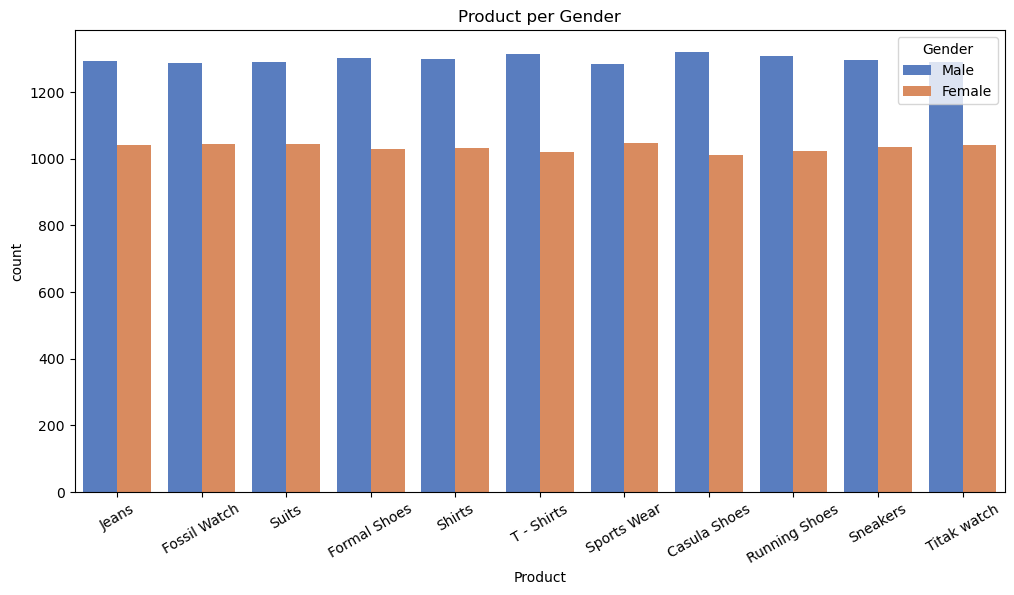

In [75]:
plt.figure(figsize=(12,6))

sns.countplot(x='Product', hue='Gender', hue_order=gender_order, palette='muted', data=df_Fash)
plt.title('Product per Gender')
plt.xticks(rotation=30)
plt.show()

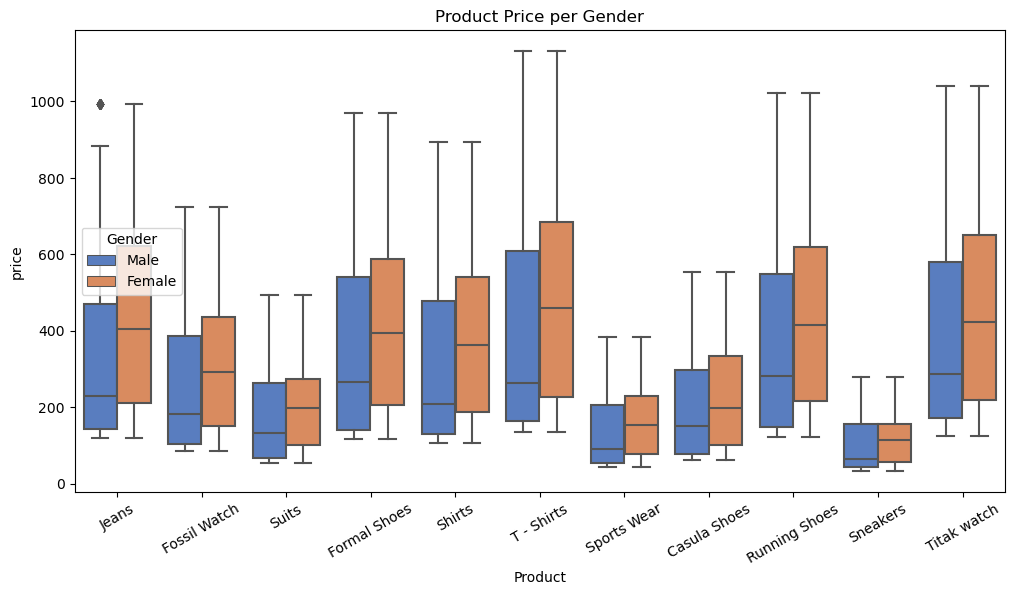

In [76]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Product', hue='Gender', y='price',hue_order=gender_order, palette='muted', data=df_Fash)
plt.title('Product Price per Gender')
plt.xticks(rotation=30)
plt.show()

In [77]:
df_VIP = df[df['Level']=='VIP']
df_VIP

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
15,2018-12-01,14:14:28,5.0,56296,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,140.0,14.0,High,credit_card,189.0,1.562541,VIP
16,2018-12-20,21:36:47,3.0,56296,Male,Web,Member,Fashion,Jeans,218.0,5.0,0.1,127.1,12.7,Medium,credit_card,993.7,1.562541,VIP
21,2018-04-21,00:03:41,7.0,50942,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,93.3,9.3,High,credit_card,817.8,1.473029,VIP
22,2018-12-19,12:58:02,6.0,50942,Male,Web,Member,Electronic,Speakers,130.0,1.0,0.2,17.5,1.8,Medium,credit_card,105.8,1.473029,VIP
29,2018-11-09,11:44:40,2.0,51542,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,4.0,0.2,18.0,1.8,Critical,credit_card,232.2,1.397056,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,2018-12-27,14:29:03,7.0,70592,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,5.0,0.3,103.6,10.4,Medium,money_order,766.4,1.594548,VIP
49987,2018-12-21,18:50:20,10.0,66872,Male,Web,Member,Home & Furniture,Beds,78.0,4.0,0.2,19.5,2.0,Medium,credit_card,251.6,1.524545,VIP
49988,2018-10-30,18:57:54,10.0,66872,Male,Web,Member,Home & Furniture,Towels,228.0,5.0,0.3,113.8,11.4,Medium,credit_card,809.4,1.524545,VIP
50310,2018-05-08,17:02:32,8.0,84253,Female,Mobile,Member,Home & Furniture,Sofa Covers,216.0,4.0,0.2,118.7,11.9,Medium,credit_card,703.1,1.482349,VIP


In [78]:
df_VIP_category_sum = df_VIP.groupby('Product_Category')['price'].sum().reset_index()
df_VIP_category_sum

,Product_Category,price
0,Auto & Accessories,269926.0
1,Electronic,84823.0
2,Fashion,1190589.5
3,Home & Furniture,632036.8


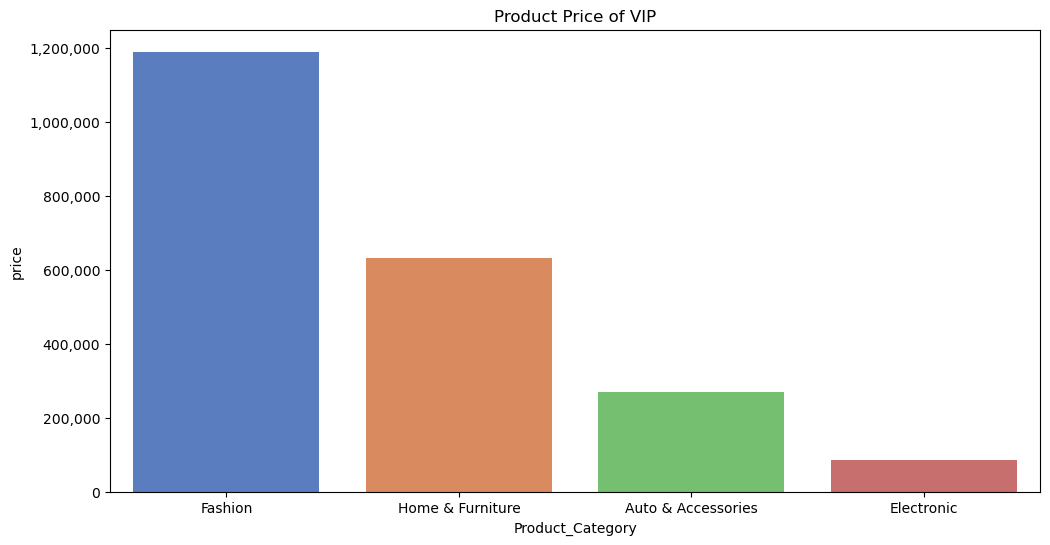

In [79]:
plt.figure(figsize=(12,6))

sns.barplot(x='Product_Category', y='price', data=df_VIP_category_sum, palette='muted', order=product_order)

from matplotlib.ticker import FuncFormatter
def format_y_tick(value, _):
    return '{:,.0f}'.format(value)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))


plt.title('Product Price of VIP')
plt.show()

<Figure size 4000x480 with 0 Axes>

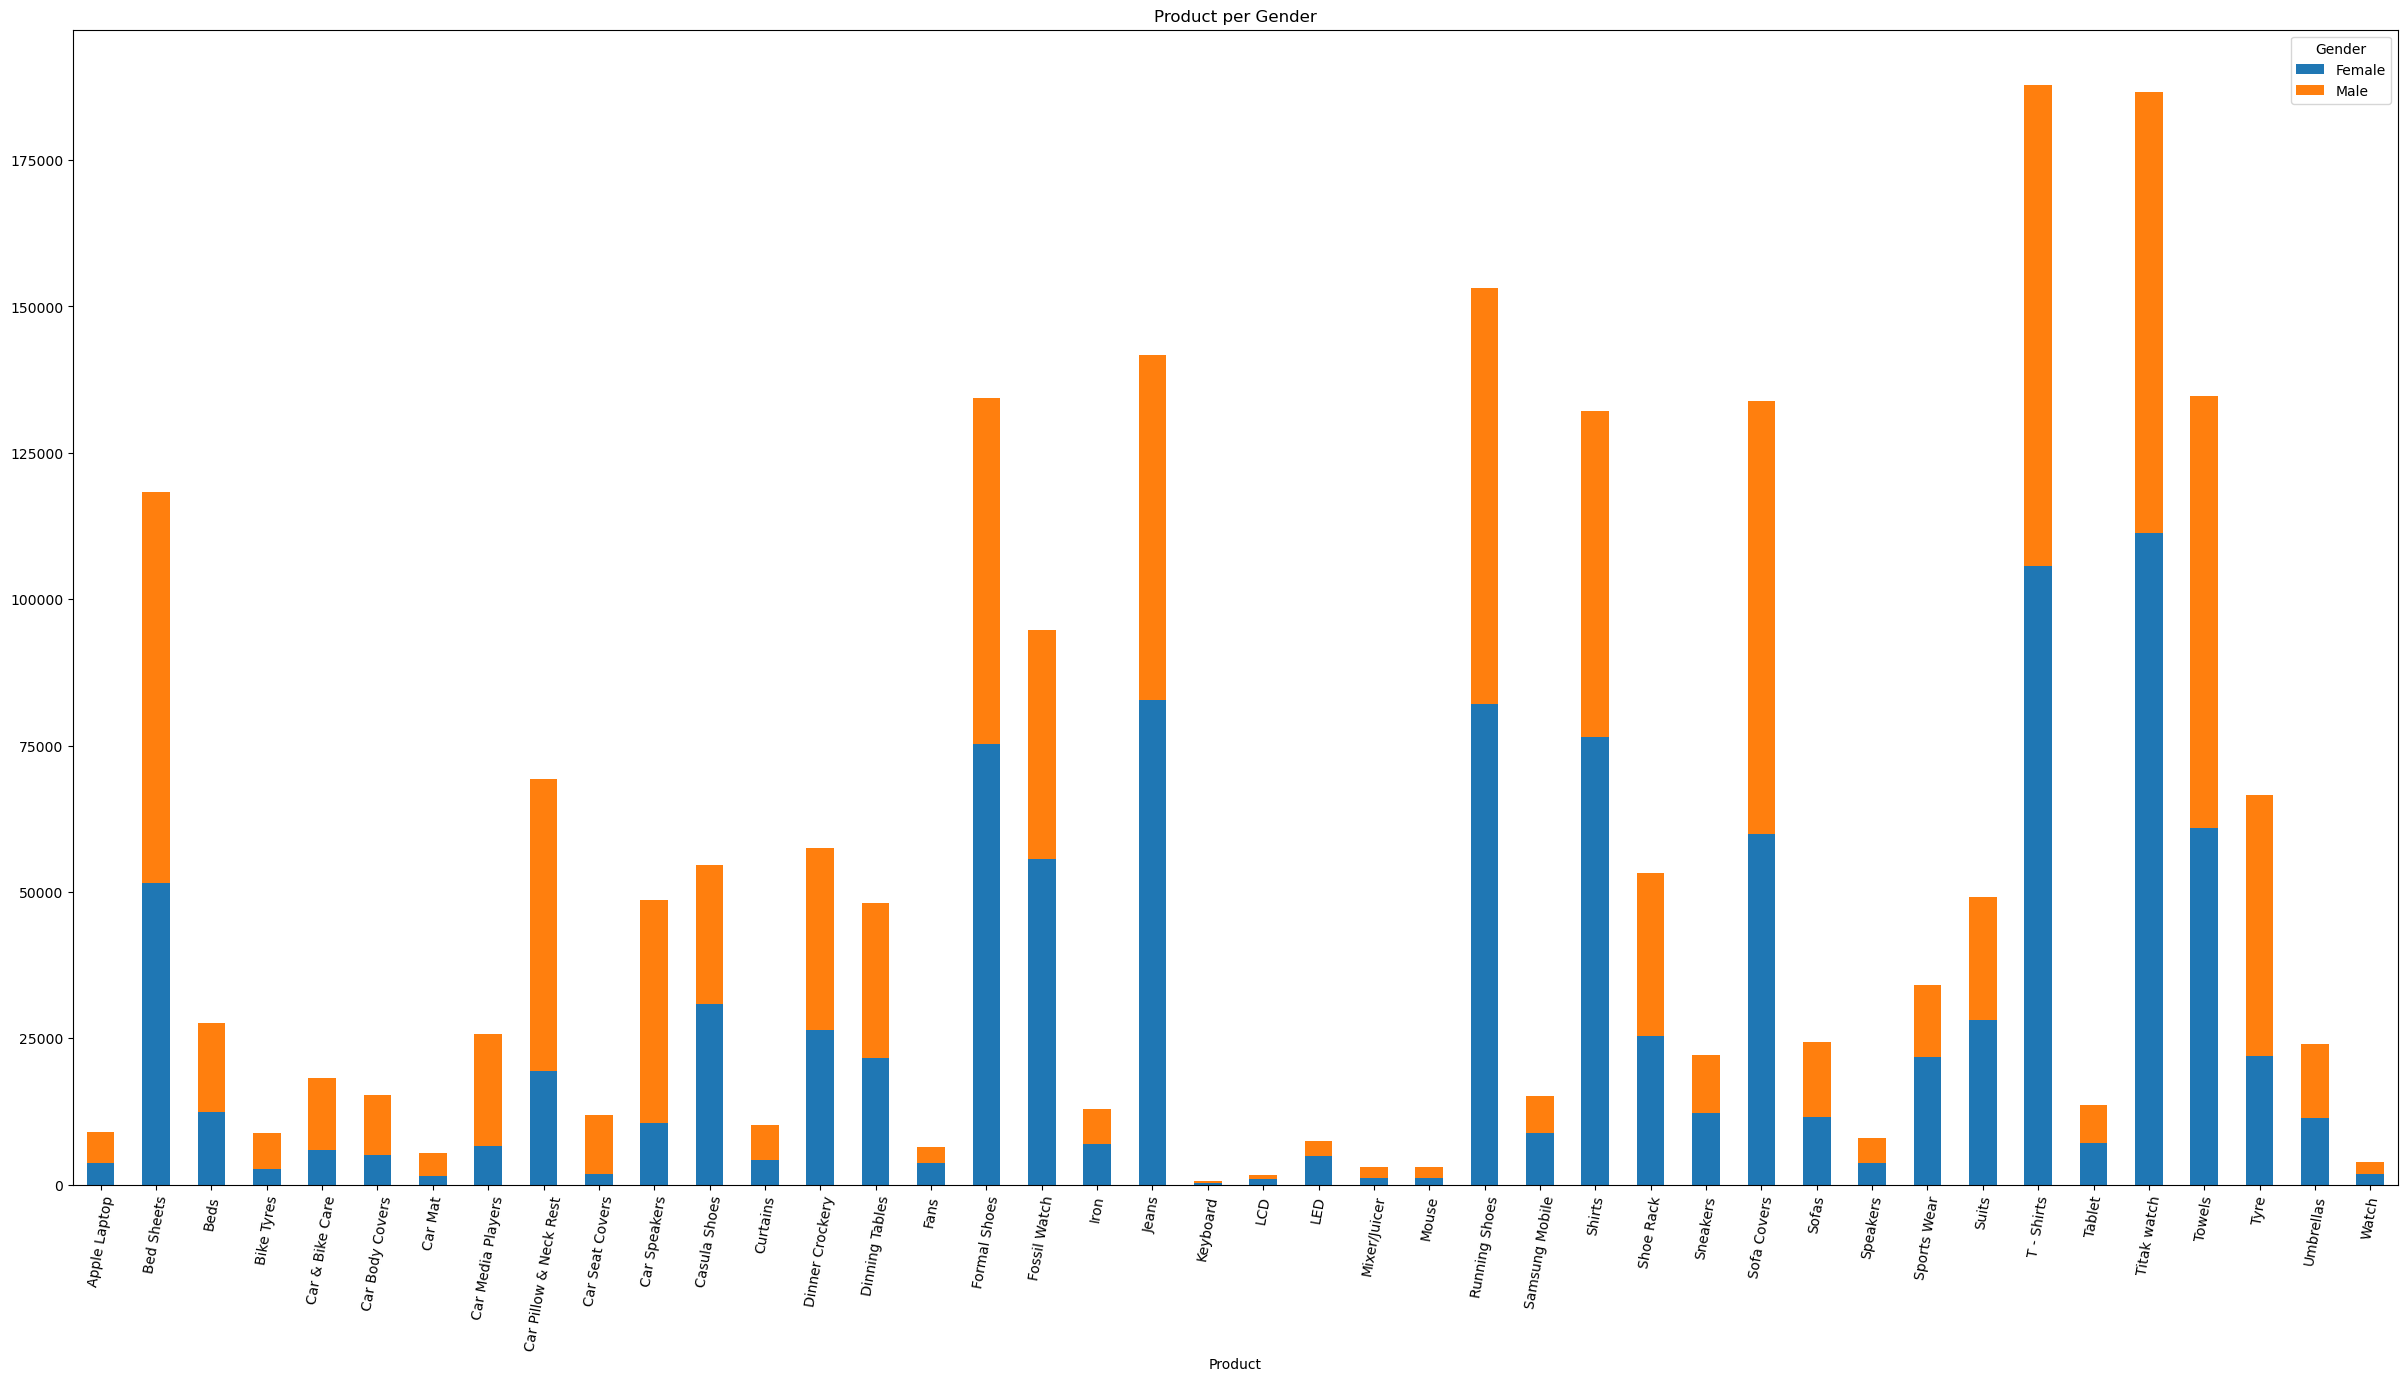

In [119]:


#sns.barplot(x='Product', hue='Gender',y='price',hue_order=gender_order, palette='muted', data=df_VIP,ci=None, estimator=np.sum, dodge=False)
plt.figure().set_figwidth(40)

df_VIP.groupby(['Product', 'Gender'])['price'].sum().unstack().plot.bar(stacked=True, figsize=(30,15))
plt.title('Product per Gender')
plt.xticks(rotation=80)
plt.show()


시간에 따른 분석

In [81]:
df_F = df[df['Gender'] == 'Female']
df_F

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,102.6,0.031183,Bronze
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,158.9,0.609263,Silver
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,529.6,1.028154,Gold
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,85.2,0.317368,Bronze
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,191.0,0.675108,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51204,2018-07-05,19:41:43,10.0,86236,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,1.0,0.4,34.1,3.4,Medium,credit_card,77.8,0.529766,Bronze
51236,2018-02-25,16:41:06,8.0,70560,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,5.0,0.3,25.4,2.5,High,debit_card,436.5,0.291746,Bronze
51268,2018-02-28,18:38:46,2.0,65870,Female,Mobile,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.2,31.9,3.2,Medium,credit_card,288.8,0.250555,Bronze
51272,2018-02-28,15:04:50,9.0,68886,Female,Mobile,Member,Home & Furniture,Beds,78.0,1.0,0.4,39.0,3.9,Medium,credit_card,50.7,0.170829,Bronze


In [82]:
df_F['Hour'] = pd.to_datetime(df_F['Time']).dt.hour
df_F

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\2998505393.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_F['Hour'] = pd.to_datetime(df_F['Time']).dt.hour
C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\2998505393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F['Hour'] = pd.to_datetime(df_F['Time']).dt.hour


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level,Hour
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,102.6,0.031183,Bronze,10
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,158.9,0.609263,Silver,20
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,529.6,1.028154,Gold,8
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,85.2,0.317368,Bronze,19
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,191.0,0.675108,Silver,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51204,2018-07-05,19:41:43,10.0,86236,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,1.0,0.4,34.1,3.4,Medium,credit_card,77.8,0.529766,Bronze,19
51236,2018-02-25,16:41:06,8.0,70560,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,5.0,0.3,25.4,2.5,High,debit_card,436.5,0.291746,Bronze,16
51268,2018-02-28,18:38:46,2.0,65870,Female,Mobile,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.2,31.9,3.2,Medium,credit_card,288.8,0.250555,Bronze,18
51272,2018-02-28,15:04:50,9.0,68886,Female,Mobile,Member,Home & Furniture,Beds,78.0,1.0,0.4,39.0,3.9,Medium,credit_card,50.7,0.170829,Bronze,15


In [83]:
df_F_H = df_F.groupby('Hour')['Quantity'].sum().reset_index()
df_F_H

,Hour,Quantity
0,0,1374.0
1,1,703.0
2,2,231.0
3,3,163.0
4,4,114.0
5,5,95.0
6,6,269.0
7,7,749.0
8,8,1857.0
9,9,2848.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


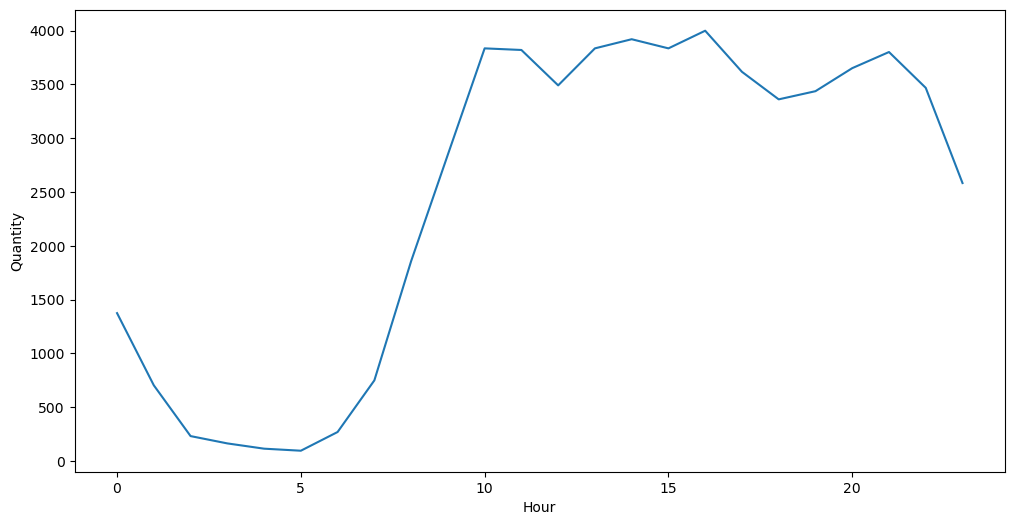

In [84]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Hour', y='Quantity', data=df_F_H)
plt.show()

In [85]:
df_M = df[df['Gender'] == 'Male']
df_M

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level
14,2018-08-01,13:01:36,2.0,18622,Male,Web,Member,Fashion,Fossil Watch,159.0,2.0,0.3,69.5,6.9,High,credit_card,229.5,0.887756,Gold
16,2018-12-20,21:36:47,3.0,56296,Male,Web,Member,Fashion,Jeans,218.0,5.0,0.1,127.1,12.7,Medium,credit_card,993.7,1.562541,VIP
22,2018-12-19,12:58:02,6.0,50942,Male,Web,Member,Electronic,Speakers,130.0,1.0,0.2,17.5,1.8,Medium,credit_card,105.8,1.473029,VIP
24,2018-04-20,23:07:17,1.0,42384,Male,Web,Member,Fashion,Formal Shoes,213.0,1.0,0.1,124.5,12.4,High,credit_card,204.1,0.597044,Silver
30,2018-04-26,23:06:02,7.0,51542,Male,Web,Member,Fashion,Shirts,196.0,5.0,0.2,96.4,9.6,High,credit_card,793.6,1.397056,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51282,2018-02-28,07:55:03,4.0,60783,Male,Web,Member,Home & Furniture,Sofas,67.0,1.0,0.4,67.0,6.7,Medium,money_order,46.9,0.169557,Bronze
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,216.7,0.226413,Bronze
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,97.1,0.186366,Bronze
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,186.0,0.216133,Bronze


In [86]:
df_M['Hour'] = pd.to_datetime(df_M['Time']).dt.hour
df_M

C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\921102726.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_M['Hour'] = pd.to_datetime(df_M['Time']).dt.hour
C:\Users\kangh\AppData\Local\Temp\ipykernel_25504\921102726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['Hour'] = pd.to_datetime(df_M['Time']).dt.hour


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,price,TotalScore,Level,Hour
14,2018-08-01,13:01:36,2.0,18622,Male,Web,Member,Fashion,Fossil Watch,159.0,2.0,0.3,69.5,6.9,High,credit_card,229.5,0.887756,Gold,13
16,2018-12-20,21:36:47,3.0,56296,Male,Web,Member,Fashion,Jeans,218.0,5.0,0.1,127.1,12.7,Medium,credit_card,993.7,1.562541,VIP,21
22,2018-12-19,12:58:02,6.0,50942,Male,Web,Member,Electronic,Speakers,130.0,1.0,0.2,17.5,1.8,Medium,credit_card,105.8,1.473029,VIP,12
24,2018-04-20,23:07:17,1.0,42384,Male,Web,Member,Fashion,Formal Shoes,213.0,1.0,0.1,124.5,12.4,High,credit_card,204.1,0.597044,Silver,23
30,2018-04-26,23:06:02,7.0,51542,Male,Web,Member,Fashion,Shirts,196.0,5.0,0.2,96.4,9.6,High,credit_card,793.6,1.397056,VIP,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51282,2018-02-28,07:55:03,4.0,60783,Male,Web,Member,Home & Furniture,Sofas,67.0,1.0,0.4,67.0,6.7,Medium,money_order,46.9,0.169557,Bronze,7
51283,2018-02-28,11:59:55,5.0,63932,Male,Web,Member,Home & Furniture,Dinning Tables,119.0,3.0,0.4,24.7,2.5,Medium,credit_card,216.7,0.226413,Bronze,11
51285,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card,97.1,0.186366,Bronze,10
51286,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card,186.0,0.216133,Bronze,10


In [87]:
df_M_H = df_M.groupby('Hour')['Quantity'].sum().reset_index()
df_M_H

,Hour,Quantity
0,0,1669.0
1,1,795.0
2,2,325.0
3,3,196.0
4,4,138.0
5,5,137.0
6,6,335.0
7,7,847.0
8,8,2156.0
9,9,3254.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


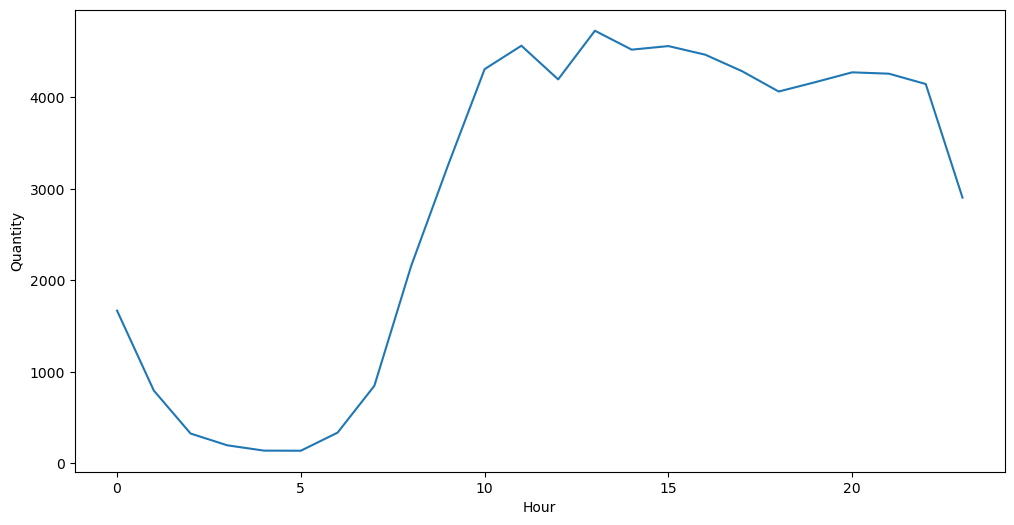

In [92]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Hour', y='Quantity', data=df_M_H)
plt.show()

In [89]:
df_H = df_F_H.merge(df_M_H, on='Hour')

In [90]:
df_H

,Hour,Quantity_x,Quantity_y
0,0,1374.0,1669.0
1,1,703.0,795.0
2,2,231.0,325.0
3,3,163.0,196.0
4,4,114.0,138.0
5,5,95.0,137.0
6,6,269.0,335.0
7,7,749.0,847.0
8,8,1857.0,2156.0
9,9,2848.0,3254.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

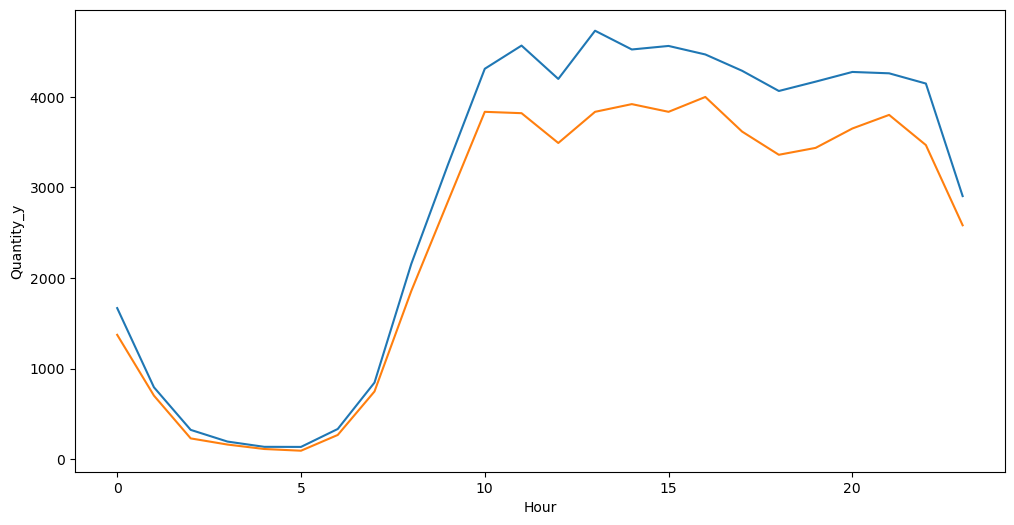

In [93]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Hour', y='Quantity_y', data=df_H)
sns.lineplot(x='Hour', y='Quantity_x', data=df_H)

plt.show()

### 분석 결과 보고서

-------------------------
#### 단일 Feature 분석

🚩각 회원의 RFM 점수를 바탕으로 나타낸 회원의 등급별 분포

<img src='./images/1.png' width='800'>

Bronze등급의 회원이 가장 많은 것을 알 수 있었고, Silver와 Gold 등급의 회원이 다음으로 많고, VIP등급의 회원이 가장 적은 것을 확인할 수 있었다.

🚩회원의 성별

<img src='./images/2.png' width='800'>

남성회원의 수가 약 10% 더 많은 것을 확인할 수 있었다.

🚩이커머스 접속수단

<img src='./images/3.png' width='800'>

웹을 통해 결제한 것이 모바일을 통해 결제한 것 보다 압도적으로 더 많았다.

🚩플랫폼에 접속한 회원의 유형

<img src='./images/4.png' width='800'>

기존 Member인 경우가 95.7%로 제일 많았다.  
그 외(others)에서는 로그인을 하지 않고 결제한 회원이 더 많았고, 처음 방문한 회원은 매우 비중이 작은 것을 알 수 있었다.

🚩각 상품의 범주별 총 결제금액과 주문 수량

<img src='./images/5.png' width='800'>

Fashion(이하 의류)에서 가장 많은 결제금액과 주문수량이 나타남을 확인할 수 있었다.  
Electronic(이하 전자기기)에서는 반대로 가장 적은 결제금액과 주문수량이 나타남을 확인했다.

🚩주문 우선순위에 따른 결제금액과 주문 수량

<img src='./images/6.png' width='800'>

확인한 결과, 주문 우선순위가 Medium에 해당되는 상품주문이 제일 많았고, Low에 해당되는 상품주문이 제일 적었다는 것을 확인할 수 있었다.

🚩결제수단과 주문 수량

<img src='./images/7.png' width='800'>

신용카드가 제일 많은 결제수단으로 회원들이 선택한 수단인 것을 알 수 있었다.
그에 반해 체크카드가 제일 적은 수로 결제된 수단이었다.  

----------------------------------
#### Feature간 비교 분석

🚩회원등급과 성별, 접속수단

<img src='./images/8.png' width='800'>

- 성별과 회원 등급
> 남성, 여성 모두 성별에 따른 회원 등급의 그래프의 차이는 크게 나타나지 않았다는 것을 알 수 있었다.  
> 남성, 여성 모두 Bronze 등급이 제일 많았고, VIP등급이 제일 적게 나타났다.

- 접속수단과 회원 등급
> 웹으로 접속한 회원 중 Bronze 등급과 Gold 등급이 가장 많았고, VIP 등급이 제일 작게 나타났다.  
> 모바일로 접속한 회원들의 등급은 대체로 균등하게 나타났다.


🚩회원등급과 상품범주, 주문우선순위

<img src='./images/9.png' width='800'>

- 상품범주와 회원 등급
> 각 상품 범주별 회원 등급을 확인한 결과, 모든 범주에서 회원 등급의 그래프는 동일한 양상으로 나타났다.  
> 각 상품 범주 중, Fashion(의류)이 가장 많은 주문 수를 차지하는 것을 확인할 수 있었고,  
> Electronic(전자기기)가 가장 적은 주문 수량을 차지하는 것을 확인할 수 있었다.

- 주문 우선순위와 회원 등급
> 주문 우선순위 중 Medium(보통)등급의 주문 우선순위가 가장 많은 것을 확인할 수 있었다.  
> 그 중, Bronze등급의 회원과 Gold등급의 회원이 가장 많이 Medium으로 주문을 한 것을 확인할 수 있었다.  
> Critical(특급)과 Low(낮음)의 주문 수량이 비슷하게 나타났다.  
> 이를 보아, 대부분의 이 플랫폼의 회원들은 우선순위를 중간 또는 높음으로 결제한다는 것을 알 수 있었다.


🚩성별과 접속수단, 상품 범주

<img src='./images/10.png' width='800'>

- 접속수단과 성별
> 접속수단별 성별을 확인한 결과, 웹으로 주문하는 회원은 남성이 약 4000명 가량 차이가 나지만,  
> 모바일로 접속하는 회원은 여성의 수가 조금 더 많은 것을 알 수 있었다.

- 상품 범주와 성별
> 상품 범주별 성별을 확인한 결과, Audio & Accessories와 Fashion부분에서는 남성회원이 더 많은 구매율이 나타났다.  
> Electronic과 Home & Furniture 부분에서는 여성회원이 더 많은 구매율이 나타남을 확인할 수 있었다.

Fashion부분에서 가장 많은 구매율이 나타나기에, Fashion의 각 항목에 따른 성별 그래프를 나타냈다.

<img src='./images/11.png' width='800'>

- Fashion의 항목과 성별
> 각 항목별 균등하게 그래프가 나타나고, 남성회원이 모든 부분에서 더 많은 구매량이 나타남을 확인할 수 있었다.  

<img src='./images/12.png' width='800'>

- Fashion의 항목별 결제금액과 성별
> 각 항목별 남녀 성별에 따른 결제 금액을 확인한 결과, 전체적인 결제 수량에 있어서는 남성회원이 많았지만   
> 결제 금액을 확인한 결과, 모든 항목에서 여성회원의 결제금액의 평균이 남성회원보다 더 높게 나타남을 확인할 수 있었다.  
> 이로보아, 남성회원이 각 항목에서 값이 싸지만 많은 수량을 구매함을 알 수 있었고,  
> 여성회원이 값이 비싸지만, 적은 수량을 구매한다는 것을 알 수 있었다.

VIP 회원에 대해서 따로 항목을 확인했다.

<img src='./images/13.png' width='800'>

- VIP회원의 각 상품 범주별 결제 금액
> 각 항목에 대해, 의류가 가장 많은 결제 금액이 나타나는 것을 확인할 수 있었고, 전자기기가 제일 적은 결제 금액이 나타났다.


<img src='./images/16.png' width='800'>

- VIP회원의 성별에 따른 상세상품별 결제 금액
> 전체 상품에 대해 확인한 결과, 남성회원이 여성회원에 비해 결제 금액이 많이 나타나는 항목은 다음과 같다.  
>> Tyre, Car Body Covers, Car Seat Covers, LCD, Sofa Covers, Shoe Rack, Towels, Curtains, Dinner Crockery, Bed Sheets, Umbrellas, Sofas

> 여성회원이 남성회원에 비해 결제 금액이 많이 나타나는 항목은 다음과 같다.  
>> Jeans, Speakers, Formal Shoes, T-Shirts, Running Shoes, Car & Bike Care, Casula Shoes, Sports Wear, LED, Samsung Mobile, Titak watch, Tablet

- 항목들을 확인한 결과, 여성이 남성보다 조금더 의류쪽에 결제금액이 조금 더 많다는 것을 알 수 있었다.
--------------------
#### 시간에 따른 분석

- 결제한 시간대에 따른 그래프를 나타내면 다음과 같다.

<img src='./images/15.png' width='800'>

확인한 결과, 남성과 여성 모두 10시부터 20시까지 가장 활발한 구매가 나타난다는 것을 확인할 수 있었다.

사견)   
미국에서의 이커머스 플랫폼 사용할 때, 접속방식에 따른 데이터가 추가적으로 있다면 모바일 사용자들에 대한 분석도 조금 더 상세하게 가능했다.  
하지만, 데이터가 존재하지 않아 모바일사용자가 적은 이유에 대해서는 확인하지 못했다.

### 🚩마케팅 전략

1. VIP 회원 확대
- 현재 VIP 회원의 수가 상대적으로 적기에, VIP 회원 확대를 위한 전략이 필요합니다.
- Bronze 등급의 회원의 수가 VIP회원에 비해 압도적으로 많기 때문에, Bronze 등급 회원을 대상으로 VIP 회원으로의 업그레이드 프로모션을 진행합니다.  
이를 통해, VIP 회원의 수를 늘리고 VIP 회원 유지를 위한 이벤트를 진행하여 Monetary 수치를 증가시켜 전체적인 매출 상승으로 유도할 수 있습니다.

2. 상품 카테고리별 마케팅
- 의류 카테고리가 가장 많은 결제금액과 주문 수량을 차지하고 있습니다. 허나 의류 카테고리의 상세 목록을 보면 전체적으로 균등한 구매량을 나타내고 있습니다. 따라서, 다음 두가지 전략을 제시합니다.
> 1. 전체 상품에 대해 1+1 이벤트 및 이월 상품에 대한 할인을 진행하여 의류 카테고리의 더욱 높은 구매를 촉진할 수 있습니다.
> 2. 특정 의류에 대한 프로모션을 진행하여 구매유도를 할 수 있습니다. 위 회원들은 전체적으로 모든 의류에 대해 관심도가 높다고 볼 수 있기 때문에, 회원 등급에 상관없이 프로모션을 진행한다면 Monetary의 상승으로 이어져 매출 상승으로 유도할 수 있습니다.

3. 시간대별 마케팅
- 시간대별 구매수량 그래프를 확인한 결과, 10시부터 20시까지에서 가장 활발한 구매가 이루어지고 있기 때문에, 이 시간대에 할인이나 프로모션등의 마케팅 활동을 집중합니다.

4. 접속 수단에 따른 마케팅
- 웹을 통해 접속하는 회원이 모바일을 통해 접속하는 회원보다 많은 것으로 나타났습니다.  
  모바일 접속 회원의 확보를 위해, 모바일 앱의 편의성 강조 및 모바일 전용 특별 혜택을 제공하여 모바일 결제 비율을 늘립니다.  
  또는 광고를 통해 신규 고객 유치 및 기존 고객에 대한 홍보를 하여, Recency와 Frequency에 상승으로 이어질 수 있습니다.  
  이는 매출 상승으로 유도할 수 있습니다.

5. 성별에 따른 마케팅
- 여성회원 타게팅
> 의류 카테고리에서는 남성 회원이 더 많은 구매량을 보이지만, 여성 회원의 결제 금액이 더 높은 것으로 나타났습니다.  
> 이는 여성 회원이 비싼 물건을 남성 회원에 비해 구매한다는 것을 알 수 있습니다.  
> 따라서, 여성회원을 대상으로 비싼 물건에 대해 할인 이벤트를 진행한다면, Monetary의 직접적인 상승으로 이어질 것입니다.